# Appendix A. Advanced Numpy

## Ndarray Object Internals

The numpy ndarray provides a means to interpret a block of homogeneous data as a multidimensional array object. The datatype/dtype determines how the data is intepreted as being a float, integer, bool etc.

Part of what makes ndarray flexible is that every array object is a strided view on a block of data. You might wonder, for example, how the array view arr[::2, ::-1] does not copy any data. This is because ndarray is more than just a chunk of memory and a dtype. It also has a "striding" information that enables the array to move through memory with varying step sizes. More precisely, the ndarray internally consists of the following:

* A pointer to data.
* The data type or dtype describing fixed-sixe value cells in the array
* A tuple indicating the arrays shape
* A tuple of strides, integers indicating the nubers of bytes to "step" in order to advance one element along a dimension.

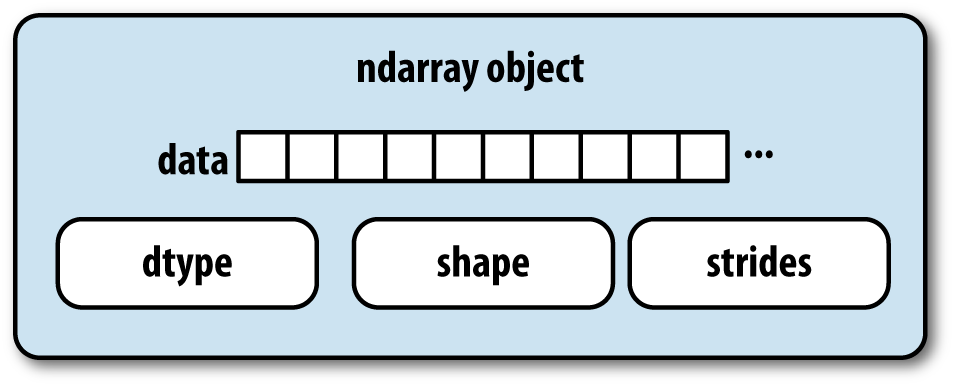

In [8]:
from IPython.display import Image
Image(filename='images/ndarray.png') 

Strides is interesting to us because it tells us how many bytes to "jump over" to the next index in the current axis. The tuple that is returned when calling strides is (axis0, axis1, axis2)

In [24]:
import numpy as np
a = np.ones((2, 3, 4))
a.strides

(96, 32, 8)

In [25]:
a

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [26]:
a.sum(axis=0)

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [27]:
a.sum(axis=1)

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [28]:
a.sum(axis=2)

array([[4., 4., 4.],
       [4., 4., 4.]])

### Numpy dtype hierarchy

You may occasionally have code that needs to check whether an array contains integers, floating-point numbers, strings, or python object Because there are mutliple types of floating point numbers, strings or python objects, checking that the dtype is among a list of types would be very verbose. Fortunately, the dtypes have superclasses such as np.integer and np.floating, which can be used in conjunction with the np.issubdtype.

In [29]:
ints = np.ones(10, dtype=np.uint16)
floats = np.ones(10, dtype=np.float32)
np.issubdtype(ints.dtype, np.integer)

True

In [30]:
np.issubdtype(floats.dtype, np.floating)

True

You can see all of the parent classes of a specific dtype by calling the type's mro method:

In [31]:
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

Therefore, we also have:

In [32]:
np.issubdtype(ints.dtype, np.number)

True

Most numpy users will never have to know about this, but it occasionaly comes in handy.

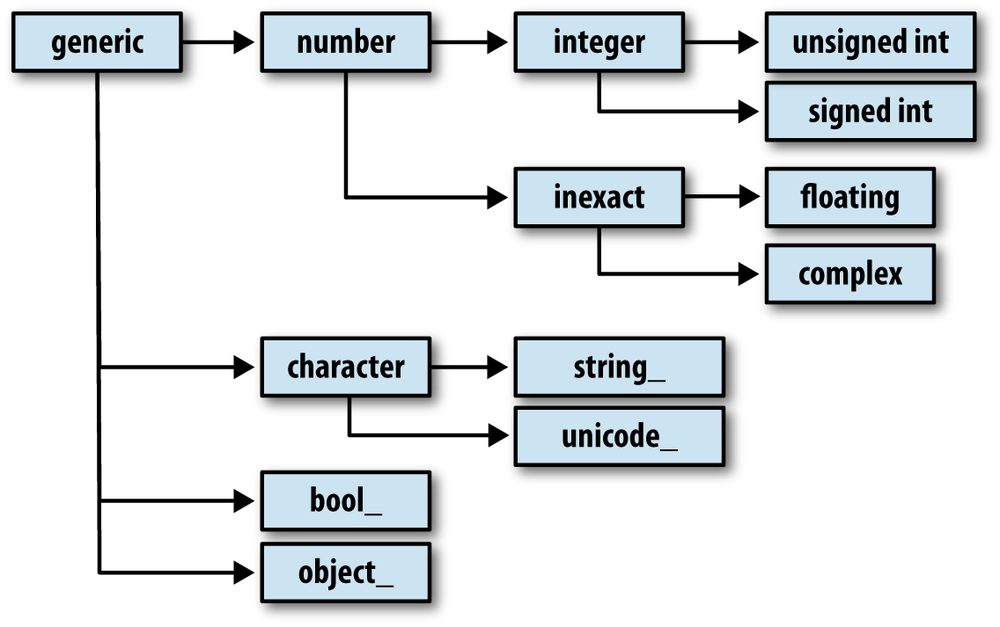

In [33]:
from IPython.display import Image
Image(filename='images/ndtype-hierarchy.png')